In [ ]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

## Load the Dat Set

Fasion Mnist is a replacement for Mnist hand written numbers dataset We the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:   

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Define Labels

Here are our class labels.  These are respective to the data we are given in the TF dataset.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore your Data

The most important step in data science is to get to know the data.  Here we look at the shape of the data the number of images and the labels and we also look a random image from the data.

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
len(test_labels)

10000

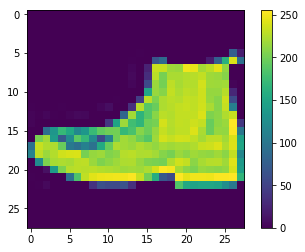

In [13]:
rand=np.random.randint(0,20000)
plt.figure()
plt.imshow(train_images[rand])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocessing

Preprocessing is very important and a large part of machine learning.  
Luckily we are given some very clean and structure data.
We onnly need to normalize the images from 0 to 1 to speed up processing

In [45]:
train_images = train_images / 255.0
test_images = test_images / 255.0

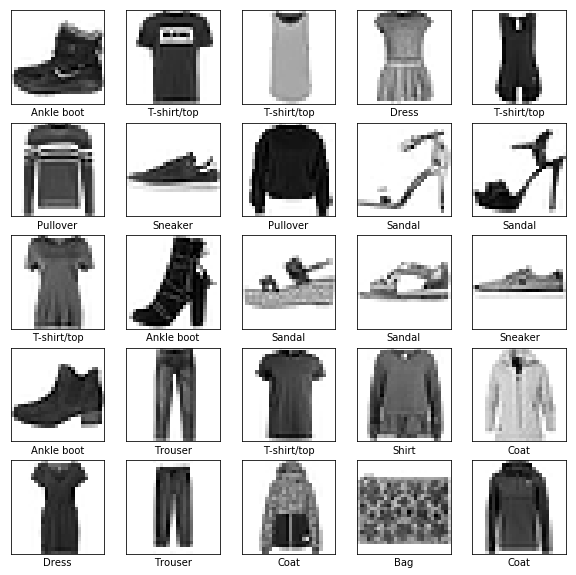

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Setup Layers

tf.keras.layers.Flatten - This layer has no parameters to learn. It only reformats the datatransforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. .

tf.keras.layers.Dense -  These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons).  We specify the relu activation function here. 

tf.keras.layers.Dense - The last layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile Model

We choose the atom optimizer and sparse categorical cross entrophy.

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model



1. Feed the train train_images and train_labels arrays into the model

2. The model learns to associate images and labels.

3. Ask the model to make predictions using the test_images array. 

4. We verify that the predictions match the labels from the test_labels array.



In [48]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5025 - acc: 0.8230
Epoch 2/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3762 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3391 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3168 - acc: 0.8833
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2984 - acc: 0.8892


## Evaluate the Model

How does our model perfom on our test data? 

In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3610 - acc: 0.8681
Test accuracy: 0.8681


## Make Some Predictions and Plot Them

In [50]:
predictions = model.predict(test_images)

In [53]:
rand=np.random.randint(0,500)
print(rand)
print(predictions[rand])
print('label',np.argmax(predictions[rand]))

393
[9.0185779e-09 3.9724712e-12 7.0400005e-12 1.2799006e-11 3.5484487e-14
 1.0000000e+00 3.6150541e-11 4.3788737e-11 7.0130929e-11 5.3828741e-10]
label 5


In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

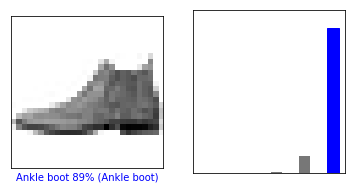

In [58]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

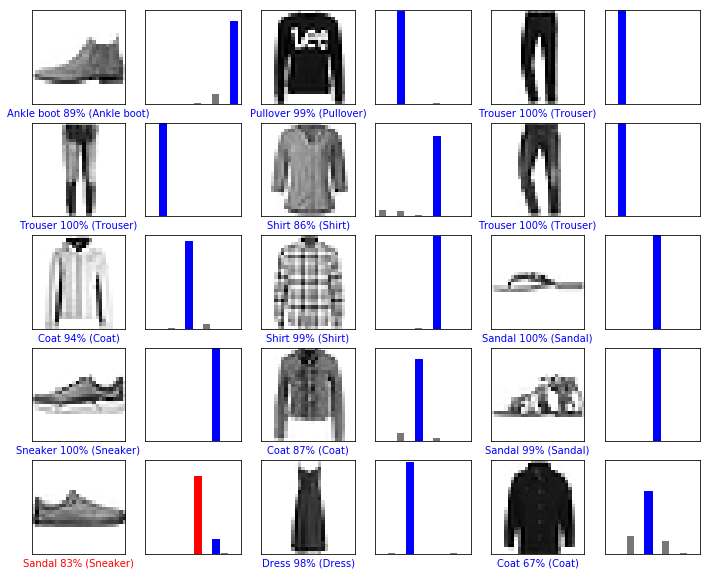

In [59]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

